In [1]:
import os
os.chdir("/home/valentin/Desktop/TagThePicture/presentation_jan_2026/TagThePicture_data/")


from main import *

indonesia_photography_dump = "./data/nmvw_dumps/indonesia_photography"

In [2]:
G = Graph_from_dump(indonesia_photography_dump)

 80%|█████████████████████████████████████████████████████████▎              | 35/44 [00:56<00:16,  1.84s/it]

./data/nmvw_dumps/indonesia_photography/025000-026000.xml failed!


 91%|█████████████████████████████████████████████████████████████████▍      | 40/44 [01:09<00:08,  2.12s/it]

./data/nmvw_dumps/indonesia_photography/030000-031000.xml failed!


100%|████████████████████████████████████████████████████████████████████████| 44/44 [01:19<00:00,  1.80s/it]


In [3]:
objects = nmvw_get_objects(G)
tags1 = nmvw_get_object_tags(G)
tags2 = Datahub_get_object_tags(objects.handle_link)

querying for object tags:   0%|                                                      | 0/666 [00:00<?, ?it/s]


KeyError: "None of ['objectURI'] are in the columns"

In [28]:
tags2 = get_object_tags(objects.handle_link)

querying for object tags: 100%|████████████████████████████████████████████| 666/666 [04:59<00:00,  2.22it/s]


In [31]:
tags2.index.value_counts()

objectURI
https://hdl.handle.net/20.500.11840/54859      30
https://hdl.handle.net/20.500.11840/507835     28
https://hdl.handle.net/20.500.11840/463224     24
https://hdl.handle.net/20.500.11840/5465       22
https://hdl.handle.net/20.500.11840/346675     20
                                               ..
https://hdl.handle.net/20.500.11840/1244245     1
https://hdl.handle.net/20.500.11840/1244313     1
https://hdl.handle.net/20.500.11840/1242839     1
https://hdl.handle.net/20.500.11840/1245383     1
https://hdl.handle.net/20.500.11840/1242981     1
Name: count, Length: 3209, dtype: int64

In [54]:
x = tags2[["material", "objecttype", "depicts"]][tags2[["material", "objecttype", "depicts"]].notna().sum(1) > 1]

len(set(x.index) & set(tags1.handle_link))

len(set(x.index))

set(x.index) - set(tags1.handle_link)

{'https://hdl.handle.net/20.500.11840/1000259',
 'https://hdl.handle.net/20.500.11840/1000260',
 'https://hdl.handle.net/20.500.11840/1000261',
 'https://hdl.handle.net/20.500.11840/1000730',
 'https://hdl.handle.net/20.500.11840/1000731',
 'https://hdl.handle.net/20.500.11840/1000735',
 'https://hdl.handle.net/20.500.11840/1000995',
 'https://hdl.handle.net/20.500.11840/1000996',
 'https://hdl.handle.net/20.500.11840/1000997',
 'https://hdl.handle.net/20.500.11840/113137',
 'https://hdl.handle.net/20.500.11840/113537',
 'https://hdl.handle.net/20.500.11840/12587',
 'https://hdl.handle.net/20.500.11840/138541',
 'https://hdl.handle.net/20.500.11840/174890',
 'https://hdl.handle.net/20.500.11840/177848',
 'https://hdl.handle.net/20.500.11840/180125',
 'https://hdl.handle.net/20.500.11840/180585',
 'https://hdl.handle.net/20.500.11840/183370',
 'https://hdl.handle.net/20.500.11840/215421',
 'https://hdl.handle.net/20.500.11840/215423',
 'https://hdl.handle.net/20.500.11840/215425',
 'htt

---
# legacy

In [ ]:
thes = get_thesaurus(sorted(set(tags.culture) | set(tags.function_context_tag)))

In [ ]:
# thes.reset_index().groupby("conceptURI").apply(lambda sub: len(sub.prefLabel.unique())).value_counts()

In [ ]:
thes.merge(tags, left_index=True, right_on="culture", how="right").prefLabel.value_counts()

In [ ]:
thes.merge(tags, left_index=True, right_on="function_context_tag", how="right").prefLabel.value_counts()

In [ ]:
tags[["handle_link", "function_context_tag"]].drop_duplicates().handle_link.value_counts()

In [ ]:
anns = get_annotations()

In [ ]:
len(set(objects.handle_link) & set(anns.objectIdentifier))

---

## tag stats

In [72]:
# tags[["handle_link", "function_context_tag"]].drop_duplicates().handle_link.value_counts().hist()
tags1[["handle_link", "function_context_tag"]].drop_duplicates().handle_link.value_counts().value_counts().sort_index()#.hist()

count
1    6142
2    1986
3     548
4      12
5       7
Name: count, dtype: int64

In [48]:
len(set(tags1.function_context_tag))

tags1.function_context_tag.value_counts()

function_context_tag
https://hdl.handle.net/20.500.11840/termmaster10049406    11433
https://hdl.handle.net/20.500.11840/termmaster10049403     1684
https://hdl.handle.net/20.500.11840/termmaster10049405     1653
https://hdl.handle.net/20.500.11840/termmaster10079680     1586
https://hdl.handle.net/20.500.11840/termmaster10049796      909
                                                          ...  
https://hdl.handle.net/20.500.11840/termmaster10079087        2
https://hdl.handle.net/20.500.11840/termmaster10079088        2
https://hdl.handle.net/20.500.11840/termmaster10048416        2
https://hdl.handle.net/20.500.11840/termmaster10079300        1
https://hdl.handle.net/20.500.11840/termmaster10079084        1
Name: count, Length: 168, dtype: int64

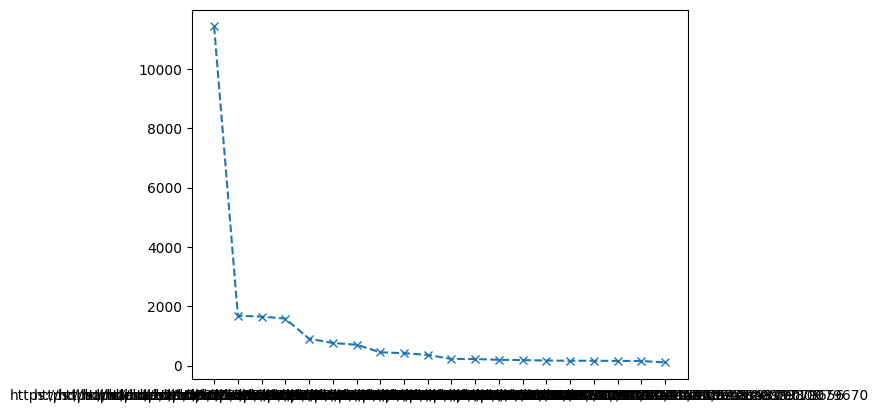

In [51]:
import matplotlib.pyplot as plt

plt.plot(tags1.function_context_tag.value_counts().iloc[:20], "x--")

In [77]:
base = tags1[["handle_link", "function_context_tag"]].drop_duplicates()

tags1.function_context_tag.value_counts()


function_context_tag
https://hdl.handle.net/20.500.11840/termmaster10049406    11433
https://hdl.handle.net/20.500.11840/termmaster10049403     1684
https://hdl.handle.net/20.500.11840/termmaster10049405     1653
https://hdl.handle.net/20.500.11840/termmaster10079680     1586
https://hdl.handle.net/20.500.11840/termmaster10049796      909
                                                          ...  
https://hdl.handle.net/20.500.11840/termmaster10079087        2
https://hdl.handle.net/20.500.11840/termmaster10079088        2
https://hdl.handle.net/20.500.11840/termmaster10048416        2
https://hdl.handle.net/20.500.11840/termmaster10079300        1
https://hdl.handle.net/20.500.11840/termmaster10079084        1
Name: count, Length: 168, dtype: int64

In [81]:
base.function_context_tag.value_counts()

function_context_tag
https://hdl.handle.net/20.500.11840/termmaster10049406    5037
https://hdl.handle.net/20.500.11840/termmaster10049403    1133
https://hdl.handle.net/20.500.11840/termmaster10049405     823
https://hdl.handle.net/20.500.11840/termmaster10079680     812
https://hdl.handle.net/20.500.11840/termmaster10049796     453
                                                          ... 
https://hdl.handle.net/20.500.11840/termmaster10079087       1
https://hdl.handle.net/20.500.11840/termmaster10048734       1
https://hdl.handle.net/20.500.11840/termmaster10048820       1
https://hdl.handle.net/20.500.11840/termmaster10079088       1
https://hdl.handle.net/20.500.11840/termmaster10048416       1
Name: count, Length: 168, dtype: int64